importar librerias a utilizar y la data

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#cargamos los datos del proyecto
data = np.load('proyecto_training_data.npy')
print('filas: ',data.shape[0])
print('columnas: ',data.shape[1])
n = len(data)
print(n)

filas:  1460
columnas:  6
1460


### Análisis exploratorio de datos.
Para cada variable en el dataset calcular((usando numpy):
* media
* valor máximo
* valor mínimo 
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviación estándar 
* Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  para graficar  un histograma de la variable.


In [4]:
#idenficando columnas del data set
sale_price = data[:,[0]] #precio de la casa en dolares
overall_qual = data[:,[1]] #califica el material y acabado de la casa del 1 al 10
square_feet = data[:,[2]] #pies cuadrados del primer piso
total_room = data[:,[3]] #total de habitaciones
year_build = data[:,[4]] #año en que se construyo
lot_frontage = data[:,[5]] #pies lineales de calle conectados a la propiedad
 
inds = np.where(np.isnan(lot_frontage)) 
lot_frontage[inds] = np.take(np.nanmean(lot_frontage), inds[1])

In [5]:
#Dividir los datos de las variables en 80% datos de entrenamiento y 20% datos de prueba

y_train = sale_price[0 : int(n * .80)];
y_test = sale_price[len(y_train): n];

x1_train = overall_qual[0 : int(n * .80)];
x1_test = overall_qual[len(x1_train): n];

x2_train = square_feet[0 : int(n * .80)];
x2_test = square_feet[len(x2_train): n];

x3_train = total_room[0 : int(n * .80)];
x3_test = total_room[len(x3_train): n];

x4_train = year_build[0 : int(n * .80)];
x4_test = year_build[len(x4_train): n];

x5_train = lot_frontage[0 : int(n * .80)];
x5_test = lot_frontage[len(x5_train): n];

SALE PRICE
media:  180921.19589041095
valor maximo:  755000.0
valor minimo:  34900.0
rango peak to peak:  [720100.]
desviación estandar:  79415.29188606751


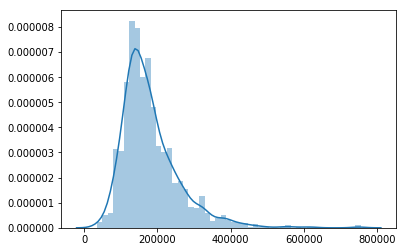

In [6]:
#calcular datos solicitudados. sale_price
print('SALE PRICE')
mu_sp = np.mean(sale_price) #media del precio de las casas
vmax_sp = np.max(sale_price) #valor maximo de precio de casas
vmin_sp = np.min(sale_price) #valor minimo de precio de casas
r_sp = np.ptp(sale_price, axis=0) #calcular rango peak to peak
ds_sp = np.std(sale_price) #calcular desviacion estandar de precio de casas

print('media: ',mu_sp)
print('valor maximo: ',vmax_sp)
print('valor minimo: ',vmin_sp)
print('rango peak to peak: ',r_sp)
print('desviación estandar: ',ds_sp)

dist_sp= sns.distplot(sale_price)

OVER ALL QUAL
media:  6.0993150684931505
valor maximo:  10.0
valor minimo:  1.0
rango peak to peak:  [9.]
desviación estandar:  1.3825228366585953


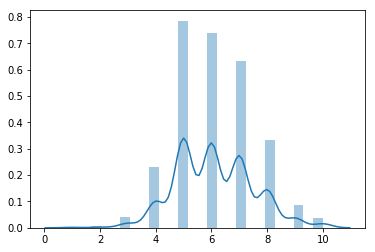

In [7]:
#calcular datos solicitudados. calificacion de acabados y materiales
print('OVER ALL QUAL')
mu_oq = np.mean(overall_qual) #media del calificacion de acabado y materiales
vmax_oq = np.max(overall_qual) #valor maximo de calificacion de acabado y materiales
vmin_oq = np.min(overall_qual) #valor minimo de calificacion de acabado y materiales
r_oq = np.ptp(overall_qual, axis=0) #calcular rango peak to peak
ds_oq = np.std(overall_qual) #calcular desviacion estandar de calificacion de acabado y materiales

print('media: ',mu_oq)
print('valor maximo: ',vmax_oq)
print('valor minimo: ',vmin_oq)
print('rango peak to peak: ',r_oq)
print('desviación estandar: ',ds_oq)

dist_sp= sns.distplot(overall_qual)

SQUARE FEET
media:  1162.626712328767
valor maximo:  4692.0
valor minimo:  334.0
rango peak to peak:  [4358.]
desviación estandar:  386.45532230228963


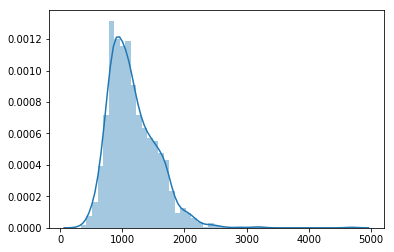

In [8]:
#calcular datos solicitudados. pies cuadrados
print('SQUARE FEET')
mu_sf = np.mean(square_feet) #media
vmax_sf = np.max(square_feet) #valor maximo
vmin_sf = np.min(square_feet) #valor minimo
r_sf = np.ptp(square_feet, axis=0) #calcular rango peak to peak
ds_sf = np.std(square_feet) #calcular desviacion estandar

print('media: ',mu_sf)
print('valor maximo: ',vmax_sf)
print('valor minimo: ',vmin_sf)
print('rango peak to peak: ',r_sf)
print('desviación estandar: ',ds_sf)

dist_sp= sns.distplot(square_feet)

TOTAL ROOM
media:  6.517808219178082
valor maximo:  14.0
valor minimo:  2.0
rango peak to peak:  [12.]
desviación estandar:  1.624836553698191


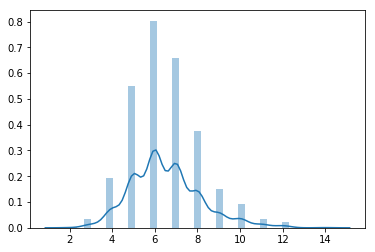

In [9]:
#calcular datos solicitudados. total de habitaciones
print('TOTAL ROOM')
mu_tr = np.mean(total_room) #media
vmax_tr = np.max(total_room) #valor maximo
vmin_tr = np.min(total_room) #valor minimo
r_tr = np.ptp(total_room, axis=0) #calcular rango peak to peak
ds_tr = np.std(total_room) #calcular desviacion estandar

print('media: ',mu_tr)
print('valor maximo: ',vmax_tr)
print('valor minimo: ',vmin_tr)
print('rango peak to peak: ',r_tr)
print('desviación estandar: ',ds_tr)

dist_sp= sns.distplot(total_room)

YEAR BUILD
media:  1971.267808219178
valor maximo:  2010.0
valor minimo:  1872.0
rango peak to peak:  [138.]
desviación estandar:  30.192558810489448


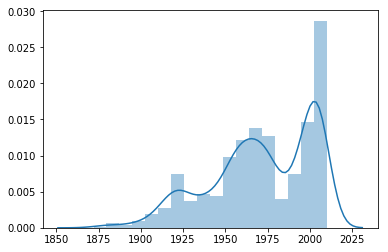

In [10]:
#calcular datos solicitudados. año de construccion
print('YEAR BUILD')
mu_yr = np.mean(year_build) #media
vmax_yr = np.max(year_build) #valor maximo
vmin_yr = np.min(year_build) #valor minimo
r_yr = np.ptp(year_build, axis=0) #calcular rango peak to peak
ds_yr = np.std(year_build) #calcular desviacion estandar

print('media: ',mu_yr)
print('valor maximo: ',vmax_yr)
print('valor minimo: ',vmin_yr)
print('rango peak to peak: ',r_yr)
print('desviación estandar: ',ds_yr)

dist_sp= sns.distplot(year_build)

LOT FRONTAGE
media:  70.04995836802664
valor maximo:  313.0
valor minimo:  21.0
rango peak to peak:  292.0
desviación estandar:  22.0164789232215


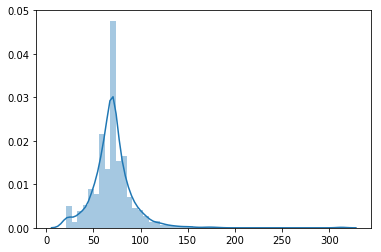

In [11]:
#calcular datos solicitudados. pies lineales al frente
print('LOT FRONTAGE')
mu_lf = np.nanmean(lot_frontage) #media
vmax_lf = np.nanmax(lot_frontage) #valor maximo
vmin_lf = np.nanmin(lot_frontage) #valor minimo
r_lf = np.ptp(lot_frontage) #calcular rango peak to peak
ds_lf = np.nanstd(lot_frontage) #calcular desviacion estandar

print('media: ',mu_lf)
print('valor maximo: ',vmax_lf)
print('valor minimo: ',vmin_lf)
print('rango peak to peak: ',r_lf)
print('desviación estandar: ',ds_lf)

dist_sp= sns.distplot(lot_frontage)

Graficar x vs y, encontrar coeficiete de corelacion entre las distintas variables independientes.
* Calcular el coeficiente de correlación entre x y y
* graficar x vs y(scatterplot) usando matplotlib
* Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica.

Para el proyecto la variable dependiente Y seria el precio de las casas sale_price.
* variables independientes.
* overall_qual
* square_feet
* total_room
* year_build
* lot_frontage


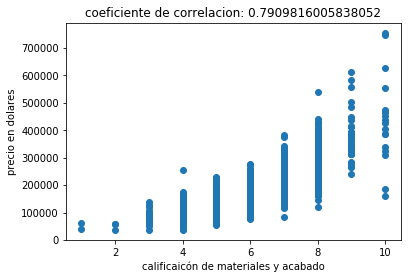

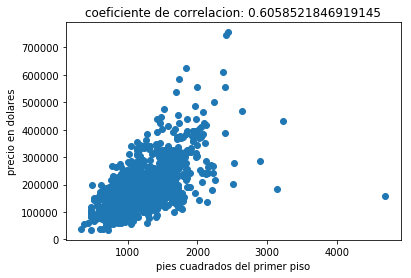

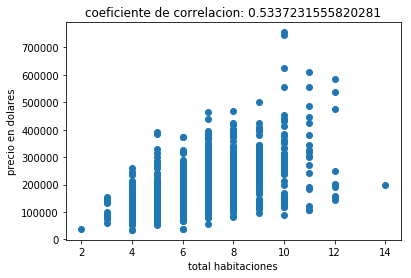

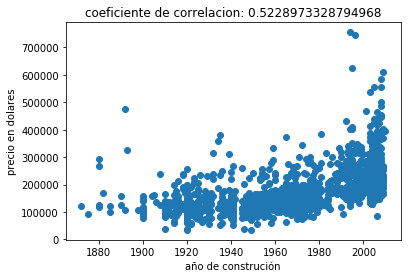

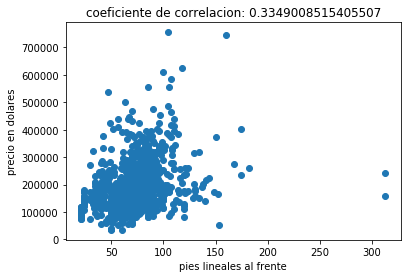

In [12]:
y = sale_price #variable dependiente
#definimos las variables independientes
x1 = overall_qual
x2 = square_feet
x3 = total_room
x4 = year_build
x5 = lot_frontage

coef_x1 = np.corrcoef(x1,y,rowvar=0)
coef_x2 = np.corrcoef(x2,y,rowvar=0)
coef_x3 = np.corrcoef(x3,y,rowvar=0)
coef_x4 = np.corrcoef(x4,y,rowvar=0)
coef_x5 = np.corrcoef(x5,y,rowvar=0)
print()

plt.scatter(x1,y)
plt.xlabel('calificaicón de materiales y acabado')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x1[0][1]))
plt.show()

plt.scatter(x2,y)
plt.xlabel('pies cuadrados del primer piso')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x2[0][1]))
plt.show()

plt.scatter(x3,y)
plt.xlabel('total habitaciones')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x3[0][1]))
plt.show()

plt.scatter(x4,y)
plt.xlabel('año de construción')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x4[0][1]))
plt.show()

plt.scatter(x5,y)
plt.xlabel('pies lineales al frente')
plt.ylabel('precio en dolares')
plt.title('coeficiente de correlacion: '+ str(coef_x5[0][1]))
plt.show()


Concluimos que las variables independientes con mas potencial predictivo son:
* overall_qual : 0.791
* square_fee : 0.606

In [13]:
#funcion que evalua el modelo
def calcular_modelo(m,x,b):
    return m*x+b

In [14]:
#funcion para calcular el error
#Calcula el error cuadrático medio entre el dato original (y) y el dato generado por el modelo (y_hat) */
def calcular_error(y,y_hat):
    N = y.shape[0]
    error = np.sum((y-y_hat)**2)/N
    return error

In [91]:
#funcion para calcular la gradiente
#Algoritmo del gradiente descendente para minimizar el error cuadrático medio

def gradiente_descendente(m_, b_, lr, x, y):
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "m" y "b"
    dm = -(2/N)*np.sum(x*(y-(m_*x+b_)))
    db = -(2/N)*np.sum(y-(m_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    m = m_ - lr*dm
    b = b_ - lr*db

    return m, b

In [96]:
m = np.random.randn(1)[0]
b = np.random.randn(1)[0]

lr = 0.009
epochs = 15000
m,b

(0.3012661353298502, 0.6598321626955512)

Entrenamiento del modelo con la primera variable independiente overall_qual

In [97]:
#entranimiento
error = np.zeros((epochs,1))
for i in range(epochs):
    # Actualizar valor de los pesos usando el gradiente descendente
    [m, b] = gradiente_descendente(m,b,lr,x1_train,y_train)

    # Calcular el valor de la predicción
    y_hat = calcular_modelo(m,x1_train,b)

    # Actualizar el valor del error
    error[i] = calcular_error(y_train,y_hat)

    # Imprimir resultados cada 1000 epochs
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    m: {:.1f}".format(m), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

Epoch 1000
    m: 38682.5  b: -53372.4
    error: [2.38391787e+09]
Epoch 2000
    m: 42543.2  b: -78097.3
    error: [2.31020369e+09]
Epoch 3000
    m: 44189.1  b: -88637.5
    error: [2.29680759e+09]
Epoch 4000
    m: 44890.7  b: -93130.8
    error: [2.29437311e+09]
Epoch 5000
    m: 45189.8  b: -95046.2
    error: [2.2939307e+09]
Epoch 6000
    m: 45317.3  b: -95862.8
    error: [2.2938503e+09]
Epoch 7000
    m: 45371.6  b: -96210.9
    error: [2.29383568e+09]
Epoch 8000
    m: 45394.8  b: -96359.3
    error: [2.29383303e+09]
Epoch 9000
    m: 45404.7  b: -96422.6
    error: [2.29383255e+09]
Epoch 10000
    m: 45408.9  b: -96449.5
    error: [2.29383246e+09]
Epoch 11000
    m: 45410.7  b: -96461.0
    error: [2.29383244e+09]
Epoch 12000
    m: 45411.4  b: -96465.9
    error: [2.29383244e+09]
Epoch 13000
    m: 45411.8  b: -96468.0
    error: [2.29383244e+09]
Epoch 14000
    m: 45411.9  b: -96468.9
    error: [2.29383244e+09]
Epoch 15000
    m: 45412.0  b: -96469.3
    error: [2.29383

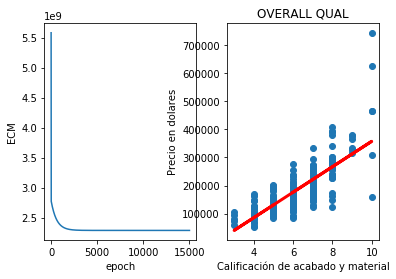

In [30]:
# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.subplot(1,2,1)
plt.plot(range(epochs),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_pred = calcular_modelo(m,x1_test,b)
plt.subplot(1,2,2)
plt.scatter(x1_test,y_test)
plt.plot(x1_test, y_pred, color="red",linewidth=3)
plt.title("OVERALL QUAL")
plt.xlabel("Calificación de acabado y material")
plt.ylabel("Precio en dolares")
plt.show()

In [94]:
m2 = np.random.randn(1)[0]
b2 = np.random.randn(1)[0]
lr2 = 0.00000065
epochs2 = 300000
m2,b2

(-0.618317482313206, 1.933702766663133)

In [95]:
#entranimiento
error2 = np.zeros((epochs2,1))
for j in range(epochs2):
    # Actualizar valor de los pesos usando el gradiente descendente
    [m2, b2] = gradiente_descendente(m2,b2,lr2,x2_train,y_train)
    
    # Calcular el valor de la predicción
    y_hat2 = calcular_modelo(m2,x2_train,b2)
    
    # Actualizar el valor del error
    error2[j] = calcular_error(y_train,y_hat2)

    # Imprimir resultados cada 1000 epochs
    if (j+1)%10000 == 0:
        print("Epoch {}".format(j+1))
        print("    m: {:.1f}".format(m2), " b: {:.1f}".format(b2))
        print("    error: {}".format(error2[j]))
        print("=======================================")

Epoch 10000
    m: 153.7  b: 39.3
    error: [3.93596172e+09]
Epoch 20000
    m: 153.6  b: 76.5
    error: [3.93574888e+09]
Epoch 30000
    m: 153.6  b: 113.6
    error: [3.93553656e+09]
Epoch 40000
    m: 153.6  b: 150.7
    error: [3.93532476e+09]
Epoch 50000
    m: 153.6  b: 187.8
    error: [3.93511349e+09]
Epoch 60000
    m: 153.5  b: 224.8
    error: [3.93490273e+09]
Epoch 70000
    m: 153.5  b: 261.8
    error: [3.93469249e+09]
Epoch 80000
    m: 153.5  b: 298.7
    error: [3.93448276e+09]
Epoch 90000
    m: 153.4  b: 335.6
    error: [3.93427355e+09]
Epoch 100000
    m: 153.4  b: 372.4
    error: [3.93406486e+09]
Epoch 110000
    m: 153.4  b: 409.2
    error: [3.93385667e+09]
Epoch 120000
    m: 153.3  b: 445.9
    error: [3.933649e+09]
Epoch 130000
    m: 153.3  b: 482.6
    error: [3.93344184e+09]
Epoch 140000
    m: 153.3  b: 519.3
    error: [3.93323518e+09]
Epoch 150000
    m: 153.3  b: 555.9
    error: [3.93302904e+09]
Epoch 160000
    m: 153.2  b: 592.4
    error: [3.932

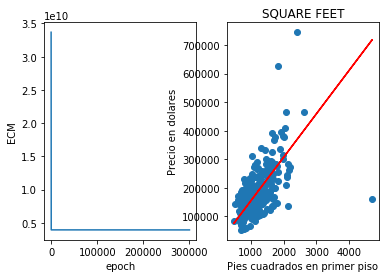

In [101]:
# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.subplot(1,2,1)
plt.plot(range(epochs2),error2)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_pred2 = calcular_modelo(m2,x2_test,b2)
plt.subplot(1,2,2)
plt.scatter(x2_test,y_test)
plt.plot(x2_test,y_pred2,'r')
plt.title("SQUARE FEET")
plt.xlabel("Pies cuadrados en primer piso")
plt.ylabel("Precio en dolares")
plt.show()

Prediccion utilizando scistick-learn para variables independientes 
* x1 = calificacion de acabado y material
* x2 = pies cuadrados del por piso


La ecuación del modelo es igual a:
 y= 45411.99877915909 x + -96469.57131873941
presicion del modelo:  0.6304202002336672


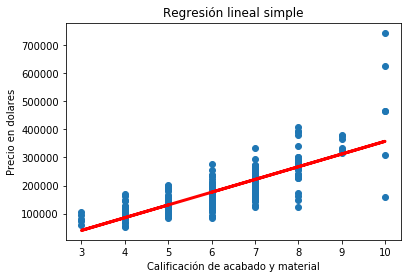

In [62]:
lr = linear_model.LinearRegression()

lr.fit(x1_train,y_train)
Ypred = lr.predict(x1_test)
print("\nLa ecuación del modelo es igual a:")
print(" y=",lr.coef_[0][0],'x +',lr.intercept_[0])
print('presicion del modelo: ', lr.score(x1_train,y_train))
ms = lr.coef_[0][0];
bs = lr.intercept_[0];

plt.scatter(x1_test,y_test)
plt.plot(x1_test,Ypred,color="red",linewidth=3)
plt.title("Regresión lineal simple")
plt.xlabel("Calificación de acabado y material")
plt.ylabel("Precio en dolares")
plt.show()


La ecuación del modelo es igual a:
 y= 108.58037880582876 x + 53268.85682046953
presicion del modelo:  0.36903657426395453


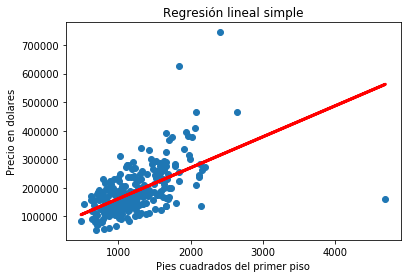

In [63]:
lr2 = linear_model.LinearRegression()

lr2.fit(x2_test,y_test)
Y2pred = lr2.predict(x2_test)


print("\nLa ecuación del modelo es igual a:")
print(" y=",lr2.coef_[0][0],'x +',lr2.intercept_[0])
print('presicion del modelo: ', lr2.score(x2_train,y_train))

m2s = lr2.coef_[0][0];
b2s = lr2.intercept_[0];

plt.scatter(x2_test,y_test)
plt.plot(x2_test,Y2pred,color="red",linewidth=3)
plt.title("Regresión lineal simple")
plt.xlabel("Pies cuadrados del primer piso")
plt.ylabel("Precio en dolares")
plt.show()

In [64]:
#modelos creados manualmente
print("modelos entrenados manualmente")

modelo_x1_m = {'m' : m, 'b' : b}
print("\npara variable overall_qual")
print(" y=",m,'x +' + str(b))

modelo_x2_m = {'m' : m2, 'b' : b2}
print("\npara variable square_feet")
print(" y=",m2,'x +' + str(b2))

print("\nmodelos entrenados con scikit-lear")

modelo_x1_ms = {'m' : ms, 'b' : bs}
print("\npara variable overall_qual")
print(" y=",ms,'x +' + str(bs))

modelo_x2_ms = {'m' : m2s, 'b' : b2s}
print("\npara variable square_feet")
print(" y=",m2s,'x +' + str(b2s))


modelos entrenados manualmente

para variable overall_qual
 y= 45411.95472718236 x +-96469.2891987884

para variable square_feet
 y= 146.37541914855765 x +9350.185232223384

modelos entrenados con scikit-lear

para variable overall_qual
 y= 45411.99877915909 x +-96469.57131873941

para variable square_feet
 y= 108.58037880582876 x +53268.85682046953


In [65]:
#definir funciones para modelos variable independiente x1 = overall_qual
def promedio_modelos(modm, mods,promedio,variable):
    pred_m = calcular_modelo(modm['m'],variable, modm['b'])
    pred_s = calcular_modelo(mods['m'], variable, modm['b'])
    prom_m_s = (pred_m + pred_s) / 2;
    
    return pred_m, pred_s, prom_m_s
    
    

In [66]:
#calculando predicciones estimadas
# modelo manual, modelo con scitik-lear, vector de tamaño x, variable
promedio = np.zeros(len(x1_test))
p = promedio_modelos(modelo_x1_m, modelo_x1_ms,promedio,x1_test)



In [67]:
def calcular_error_graph(modm,mods):
    pred1_m = calcular_modelo(modm['m'],x1_test, modm['b'])
    pred1_s = calcular_modelo(mods['m'], x1_test, modm['b'])
    
    pred2_m = calcular_modelo(modm['m'],x2_test, modm['b'])
    pred2_s = calcular_modelo(mods['m'], x2_test, modm['b'])
    
    error1_m = calcular_error(y_test,pred1_m)
    error1_s = calcular_error(y_test,pred1_s)
    
    error2_m = calcular_error(y_test,pred2_m)
    error2_s = calcular_error(y_test,pred2_s)
    
    return error1_m, error1_s, error2_m, error2_s
    

variable x1 overrall_qual entranamiento manual:  2630182574.0972757
variable x2 square_feet entrenamiento manual:  2630181456.0638986
variable x1 overrall_qual scikit-learn:  3264741636424615.5
variable x2 square_feet scikit-learn:  3264748001167844.0
1118.0333771705627


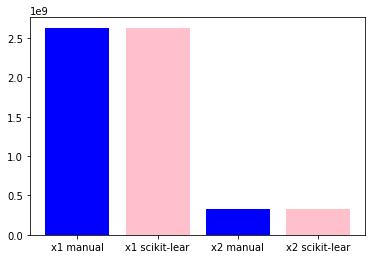

In [90]:
error = calcular_error_graph(modelo_x1_m, modelo_x1_ms)
print('variable x1 overrall_qual entranamiento manual: ',error[0])
print('variable x2 square_feet entrenamiento manual: ',error[1])
print('variable x1 overrall_qual scikit-learn: ',error[2])
print('variable x2 square_feet scikit-learn: ',error[3])
print(error[0]-error[1])
height = [error[0], error[1], error[2]/10000000, error[3]/10000000] #para poder visualizar en la gráfica
bars = ('x1 manual', 'x1 scikit-lear', 'x2 manual', 'x2 scikit-lear')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue', 'pink', 'blue','pink'])
plt.xticks(y_pos, bars)
plt.show()

